In [2]:
! pip install keras tensorflow

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

# Extract the labels
train_labels = train_data.iloc[:, 0].values
test_labels = test_data.iloc[:, 0].values

# Extract the features
train_features = train_data.iloc[:, 1:].values
test_features = test_data.iloc[:, 1:].values


In [8]:
train_labels = train_data['label'].values
test_labels = test_data['label'].values
train_features = train_data.drop(['label'], axis=1).values.astype('float32')
test_features = test_data.drop(['label'], axis=1).values.astype('float32')


In [4]:
# Normalize the pixel values
train_features = train_features / 255
test_features = test_features / 255


In [5]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(256, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [6]:
# Train the model
model.fit(train_features, train_labels, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2264 - accuracy: 0.9345
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0929 - accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0623 - accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0143 - accuracy: 0.9954
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_features, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0772 - accuracy: 0.9806
Test Loss: 0.0772460475564003, Test Accuracy: 0.9805999994277954


In [9]:
loss, accuracy = model.evaluate(test_features, test_labels, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 16.794462203979492
Test accuracy: 0.9805999994277954


Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 6.2386 - accuracy: 0.9870 - val_loss: 2.4547 - val_accuracy: 0.9922
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 2.3278 - accuracy: 0.9928 - val_loss: 3.4043 - val_accuracy: 0.9912
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.1293 - accuracy: 0.9937 - val_loss: 2.1614 - val_accuracy: 0.9943
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.0579 - accuracy: 0.9937 - val_loss: 4.9839 - val_accuracy: 0.9898
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 1.7435 - accuracy: 0.9943 - val_loss: 4.0687 - val_accuracy: 0.9932
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.9291 - accuracy: 0.9941 - val_loss: 4.3136 - val_accuracy: 0.9917
Epoch 7/10
1688/1688 [==============================] - 8s 4ms/step - loss: 1.7092 - accuracy: 0.9946 - val_loss: 6.1946 - val_accuracy

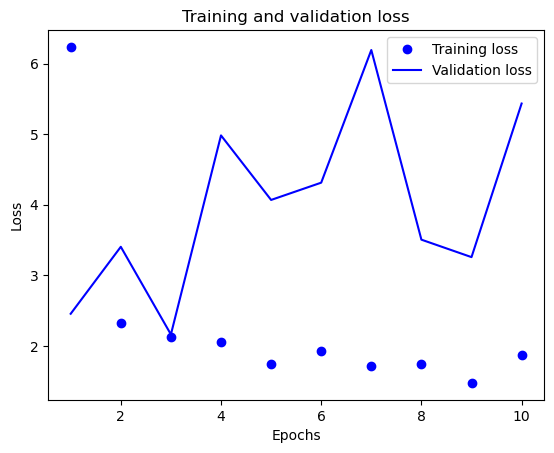

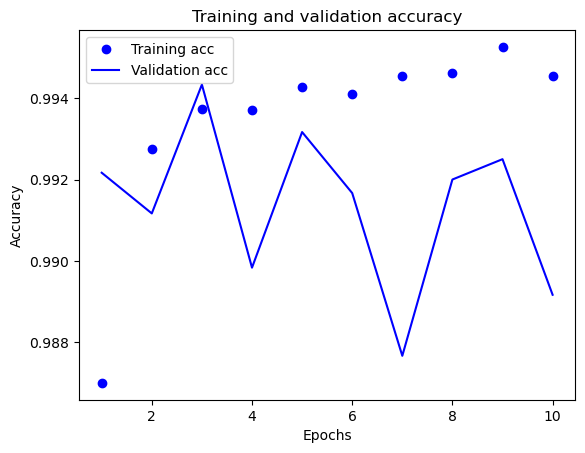

In [11]:
# Plot the training and validation loss and accuracy
import matplotlib.pyplot as plt
history = model.fit(train_features, train_labels, epochs=10, batch_size=32, verbose=1, validation_split=0.1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
# Make predictions on the test set
predicted_probs = model.predict(test_features)
predicted_labels = np.argmax(predicted_probs, axis=1)



313/313 [==============================] - 1s 3ms/step


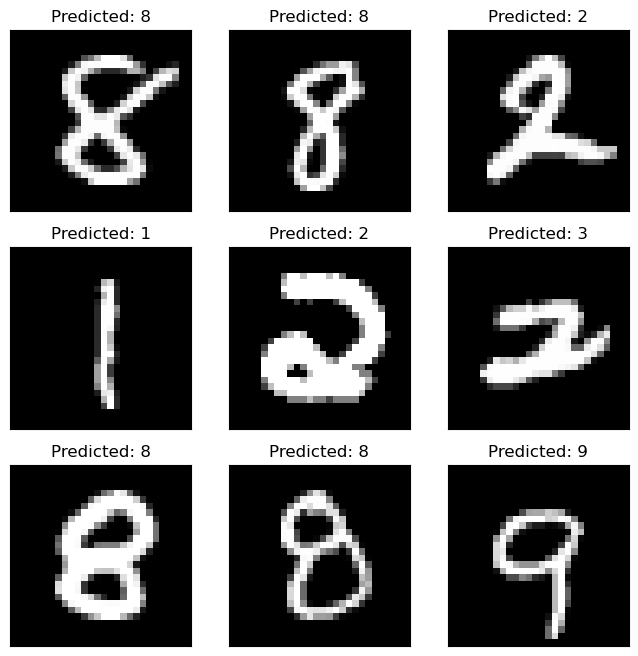

In [16]:
# Plot a random sample of test images with their predicted labels
figure = plt.figure(figsize=(8, 8))
for i in range(9):
    # Select a random test image and its predicted label
    index = np.random.randint(0, len(test_features))
    image = test_features[index].reshape((28, 28))
    predicted_label = predicted_labels[index]
    
    # Plot the image and its predicted label
    subplot = figure.add_subplot(3, 3, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(image, cmap='gray')
    subplot.set_title(f'Predicted: {predicted_label}')

plt.show()
